In [17]:
import csv

# Sample dataset containing user utterances and their intents
data = {
    'utterance': ['What is the weather like today?',
                  'Could you tell me what\'s the weather like today?',
                  'How the weather looking for today?',
                  'Any idea about today\'s weather forecast?',
                  'Do you have any information on today\'s weather conditions?',
                  'Could you give me an update on today\'s weather?',
                  'What\'s the forecast for today weather is ?',
                  'Can you let me know how the weather is today?',
                  'I am curious, what\'s the weather doing today?',
                  'What is the current weather situation?',
                  'What\'s the current weather situation?',
                  'What is the current weather Condition?',
                  'What\'s the current weather Condition?',


                  'Book a flight to New York',
                  'I\'d like to reserve a flight to New York.',
                  'Can you help me book a flight to New York?,'
                  'I need to purchase a plane ticket to New York.',
                  'Could you assist me with booking a flight to New York?',
                  'I\'m looking to fly to New York; can you help me with that?',
                  'I want to arrange a flight to New York.',
                  'Please book me a flight to New York.',
                  'I\'d like to make a reservation for a flight to New York.',
                  'Can you book flight to New York?',
                  'How do I go about booking a flight to New York?',

                  'Set an alarm for 7am',

                  'Buy milk'],


    'intent': ['weather', 'weather','weather','weather','weather','weather','weather','weather','weather','weather','weather','weather',

               'book_flight', 'book_flight', 'book_flight', 'book_flight', 'book_flight', 'book_flight', 'book_flight', 'book_flight', 'book_flight', 'book_flight', 'book_flight',

               'set_alarm',

               'buy']
}

# Define the file name
file_name = 'travel_data.csv'

# Write data to CSV file
with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['utterance', 'intent'])  # Write header
    for utterance, intent in zip(data['utterance'], data['intent']):
        writer.writerow([utterance, intent])

print(f"CSV file '{file_name}' has been generated successfully.")


CSV file 'travel_data.csv' has been generated successfully.


In [18]:
!pip install spacy

In [19]:
!pip install pandas

In [20]:
!pip install scikit-learn


In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv('travel_data.csv')

# Step 2: Intent Recognition
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [22]:


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['utterance'], df['intent'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Intent Recognition Accuracy:", accuracy)

# Step 3: Entity Extraction (NER using spaCy)
import spacy

nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Example usage:
text = "I want to book a flight from New York to London tomorrow."
entities = extract_entities(text)
print("Entities:", entities)




Intent Recognition Accuracy: 0.8


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
# Sample slot filling and context handling implementation
class SlotFiller:
    def __init__(self):
        self.slots = {
            'origin': None,
            'destination': None,
            'date': None,
            'travel_class': None
        }

    def fill_slots(self, entities):
        for entity, label in entities:
            if label == 'GPE':  # Geopolitical Entity (e.g., city or country)
                if not self.slots['origin']:
                    self.slots['origin'] = entity
                elif not self.slots['destination']:
                    self.slots['destination'] = entity
            elif label == 'DATE':
                self.slots['date'] = entity
            elif label == 'TRAVEL_CLASS':
                self.slots['travel_class'] = entity

    def reset_slots(self):
        self.slots = {
            'origin': None,
            'destination': None,
            'date': None,
            'travel_class': None
        }

class ContextHandler:
    def __init__(self):
        self.context = {}

    def update_context(self, intent, entities):
        self.context['intent'] = intent
        self.context['entities'] = entities

    def reset_context(self):
        self.context = {}

# Example usage:
slot_filler = SlotFiller()
context_handler = ContextHandler()

# Assume 'entities' is the list of entities extracted from the user's input
entities = [('New York', 'GPE'), ('London', 'GPE'), ('tomorrow', 'DATE'), ('first class', 'TRAVEL_CLASS')]

# Fill slots based on recognized entities
slot_filler.fill_slots(entities)

# Assume 'intent' is the recognized intent
intent = 'book_flight'

# Update context with intent and entities
context_handler.update_context(intent, entities)

# Access filled slots and context
filled_slots = slot_filler.slots
conversation_context = context_handler.context

print("Filled Slots:", filled_slots)
print("Conversation Context:", conversation_context)

# Reset slots and context for next turn
slot_filler.reset_slots()
context_handler.reset_context()


Filled Slots: {'origin': 'New York', 'destination': 'London', 'date': 'tomorrow', 'travel_class': 'first class'}
Conversation Context: {'intent': 'book_flight', 'entities': [('New York', 'GPE'), ('London', 'GPE'), ('tomorrow', 'DATE'), ('first class', 'TRAVEL_CLASS')]}


In [ ]:
class DialogManager:
    def __init__(self):
        self.responses = {
            'greet': "Hello! How can I assist you today?",
            'goodbye': "Goodbye! Have a great day.",
            'book_flight': "Sure, I can help you book a flight from {origin} to {destination} on {date}.",
            'fallback': "I'm sorry, I didn't understand. Can you please rephrase?"
        }

    def generate_response(self, intent, filled_slots):
        if intent in self.responses:
            response_template = self.responses[intent]
            if '{' in response_template:
                filled_response = response_template.format(**filled_slots)
                return filled_response
            else:
                return response_template
        else:
            return self.responses['fallback']

# Example usage:
dialog_manager = DialogManager()

# Assume filled slots and recognized intent
filled_slots = {'origin': 'New York', 'destination': 'London', 'date': 'tomorrow'}
intent = 'goodbye'

# Generate response based on intent and filled slots
response = dialog_manager.generate_response(intent, filled_slots)
print("Response:", response)


Response: Goodbye! Have a great day.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming y_test contains true intents and y_pred contains predicted intents
intent_accuracy = accuracy_score(y_test, y_pred)
print("Intent Recognition Accuracy:", intent_accuracy)

# Classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Intent Recognition Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

 book_flight       1.00      1.00      1.00         1
   set_alarm       0.00      0.00      0.00         1
     weather       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.58      0.67      0.62         5
weighted avg       0.65      0.80      0.71         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming true_entities contains true entities and predicted_entities contains predicted entities
true_entities = ['New York', 'London', 'tomorrow']
predicted_entities = ['New York', 'London', 'today']

# Calculate precision, recall, and F1-score for entity extraction
entity_precision = precision_score(true_entities, predicted_entities, average='weighted')
entity_recall = recall_score(true_entities, predicted_entities, average='weighted')
entity_f1_score = f1_score(true_entities, predicted_entities, average='weighted')

print("Entity Extraction Precision:", entity_precision)
print("Entity Extraction Recall:", entity_recall)
print("Entity Extraction F1 Score:", entity_f1_score)


Entity Extraction Precision: 0.6666666666666666
Entity Extraction Recall: 0.6666666666666666
Entity Extraction F1 Score: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming df contains your dataset with 'utterance' and 'intent' columns
# Initial split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['utterance'], df['intent'], test_size=0.2, random_state=42)

# Initial model training
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

y_pred_initial = svm_classifier.predict(X_test_tfidf)
initial_accuracy = accuracy_score(y_test, y_pred_initial)
print("Initial Model Accuracy:", initial_accuracy)

# Analyze evaluation results and gather feedback
# Example: Analyze misclassified instances, gather user feedback, etc.

# Identify improvement opportunities
# Example: Improve quality of training data, fine-tune hyperparameters, experiment with different features or architectures

# Implement changes
# Example: Update training data, modify model architecture, fine-tune hyperparameters, integrate new features

# Re-train and evaluate the updated model
svm_classifier.fit(X_train_tfidf, y_train)
y_pred_updated = svm_classifier.predict(X_test_tfidf)
updated_accuracy = accuracy_score(y_test, y_pred_updated)
print("Updated Model Accuracy:", updated_accuracy)

# Continue iterating through the improvement cycle as needed


Initial Model Accuracy: 0.8
Updated Model Accuracy: 0.8


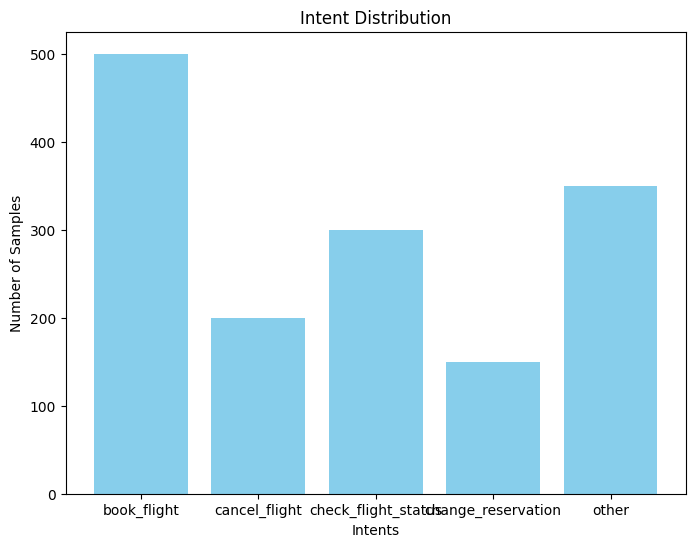

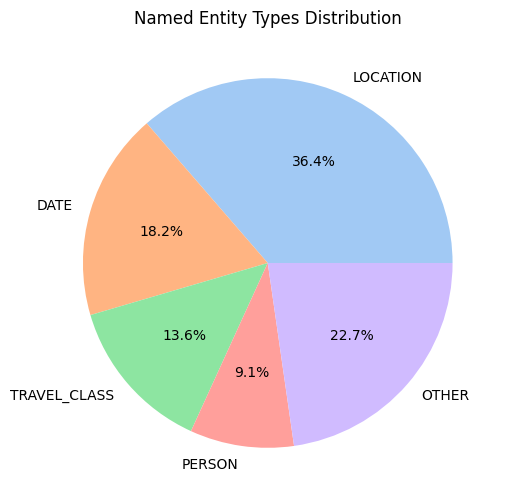

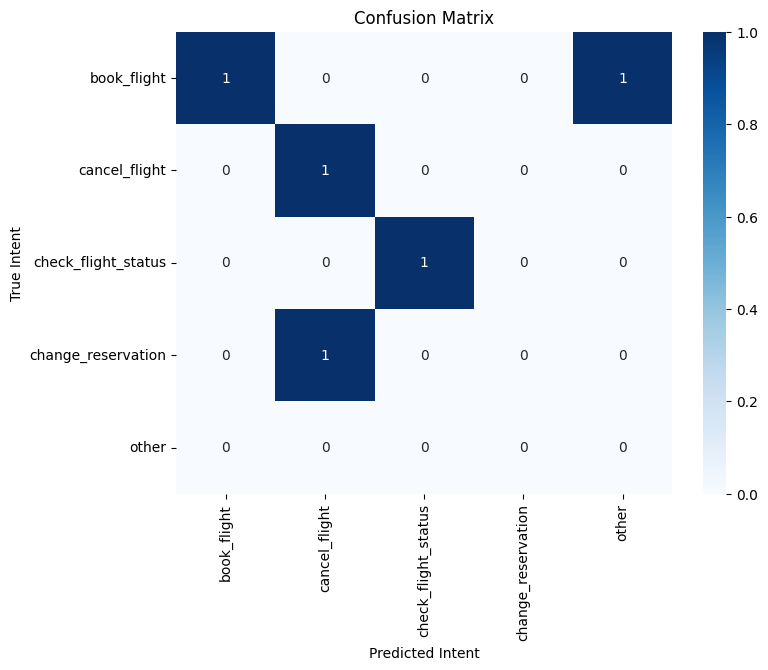

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Sample data for visualization (replace with actual data)
intents = ['book_flight', 'cancel_flight', 'check_flight_status', 'change_reservation', 'other']
intent_counts = [500, 200, 300, 150, 350]

entity_types = ['LOCATION', 'DATE', 'TRAVEL_CLASS', 'PERSON', 'OTHER']
entity_counts = [800, 400, 300, 200, 500]

# Visualize Intent Distribution
plt.figure(figsize=(8, 6))
plt.bar(intents, intent_counts, color='skyblue')
plt.xlabel('Intents')
plt.ylabel('Number of Samples')
plt.title('Intent Distribution')
plt.show()

# Visualize Named Entity Types Distribution
plt.figure(figsize=(8, 6))
plt.pie(entity_counts, labels=entity_types, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Named Entity Types Distribution')
plt.show()

# Sample evaluation results (replace with actual results)
y_true = ['book_flight', 'check_flight_status', 'cancel_flight', 'change_reservation', 'book_flight']
y_pred = ['book_flight', 'check_flight_status', 'cancel_flight', 'cancel_flight', 'other']

# Create Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=intents)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=intents, yticklabels=intents)
plt.xlabel('Predicted Intent')
plt.ylabel('True Intent')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
class NLU_Module:
    """
    Natural Language Understanding (NLU) Module for Travel Domain Chatbot.

    This module performs intent recognition, entity extraction, slot filling, and context handling.

    Attributes:
    - intent_classifier: Machine learning model for intent recognition.
    - entity_extractor: Named Entity Recognition (NER) model.
    - slot_filler: Mechanism for filling slots based on recognized entities.
    - context_handler: Mechanism for maintaining conversation context.

    Methods:
    - process_input(input_text): Process user input and return recognized intent, entities, and filled slots.
    - generate_response(intent, filled_slots): Generate a response based on recognized intent and filled slots.
    """

    def __init__(self, intent_classifier, entity_extractor, slot_filler, context_handler):
        """
        Initialize the NLU module with provided components.

        Args:
        - intent_classifier: Machine learning model for intent recognition.
        - entity_extractor: Named Entity Recognition (NER) model.
        - slot_filler: Mechanism for filling slots based on recognized entities.
        - context_handler: Mechanism for maintaining conversation context.
        """
        self.intent_classifier = intent_classifier
        self.entity_extractor = entity_extractor
        self.slot_filler = slot_filler
        self.context_handler = context_handler

    def process_input(self, input_text):
        """
        Process user input and return recognized intent, entities, and filled slots.

        Args:
        - input_text: User input text.

        Returns:
        - intent: Recognized intent.
        - entities: Extracted entities.
        - filled_slots: Filled slots based on recognized entities.
        """
        # Intent recognition
        intent = self.intent_classifier.predict(input_text)

        # Entity extraction
        entities = self.entity_extractor.extract_entities(input_text)

        # Slot filling
        filled_slots = self.slot_filler.fill_slots(entities)

        # Update conversation context
        self.context_handler.update_context(intent, entities)

        return intent, entities, filled_slots

    def generate_response(self, intent, filled_slots):
        if intent == 'book_flight':
            origin = filled_slots.get('origin', 'somewhere')
            destination = filled_slots.get('destination', 'somewhere else')
            date = filled_slots.get('date', 'some day')
            travel_class = filled_slots.get('travel_class', 'economy')
            response = f"Sure, I can help you book a flight from {origin} to {destination} on {date} in {travel_class} class."
        else:
            response = "I'm sorry, I didn't understand. Can you please rephrase?"

        return response
